In [1]:
#Import necessary packages.

import numpy as np
from keras.callbacks import EarlyStopping
from keras.layers import Dense, Dropout
from keras.models import load_model, Sequential
from keras.optimizers import Adam
import matplotlib.pyplot as plt
import os
import pickle

%matplotlib inline

current_directory = os.getcwd()

/home/andrzej/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
#Load datasets.

X_train = np.load("Training_data.npy")
X_test = np.load("Test_data.npy")
Y_train = np.load('Training_labels.npy')
Y_test = np.load('Test_labels.npy')

print(X_train.shape)
print(X_test.shape)
print(len(Y_train))
print(len(Y_test))

(470275, 512)
(52253, 512)
470275
52253


In [3]:
#Regularize the data.

mean = X_train.mean(axis = 0)
X_train -= mean
X_test -= mean

std = X_train.std(axis = 0)
X_train /= std
X_test /= std

In [ ]:
#[OPTIONAL] Choose a smaller sample.

train_data_selection = int(X_train.shape[0]*0.1)
test_data_selection = int(X_test.shape[0]*0.1)

X_train = X_train[:train_data_selection]
Y_train = Y_train[:train_data_selection]
X_test = X_test[:test_data_selection]
Y_test = Y_test[:test_data_selection]

print(X_train.shape)
print(X_test.shape)
print(len(Y_train))
print(len(Y_test))

In [4]:
#Train network models.
        
for l1 in range(6, 11):
    for l2 in range(6, l1 + 1):
        model = Sequential()
        model.add(Dense(2 ** l1, activation = 'relu', input_shape = (512,)))
        model.add(Dropout(0.5))
        model.add(Dense(2 ** l2, activation = 'relu'))
        model.add(Dropout(0.5))
        model.add(Dense(1, activation = 'sigmoid'))
        model.compile(optimizer = Adam(lr = 0.0001), loss = 'binary_crossentropy', metrics = ['accuracy'])
        model.summary()
        
        callbacks_list = [EarlyStopping(monitor = 'val_acc', patience = 25)]
        
        history = model.fit(X_train, Y_train, epochs = 1500, batch_size = 4096, shuffle = True,
                            callbacks = callbacks_list, validation_split = 0.1, verbose = 0)
        
        os.chdir(current_directory + '/two_layer_dense_models/models')
        model.save('{}x{}_model.h5'.format(2 ** l1, 2 ** l2))
        
        os.chdir(current_directory + '/two_layer_dense_models/histories')
        with open('{}x{}_model_history.pickle'.format(2 ** l1, 2 ** l2), 'wb') as dictionary:
            pickle.dump(history.history, dictionary, protocol=pickle.HIGHEST_PROTOCOL)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                32832     
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 37,057
Trainable params: 37,057
Non-trainable params: 0
_________________________________________________________________
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_19 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_29 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_20 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_30 (Dense)             (None, 1)                 513       
Total params: 525,825
Trainable params: 525,825
Non-trainable params: 0
_________________________________________________________________
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dens

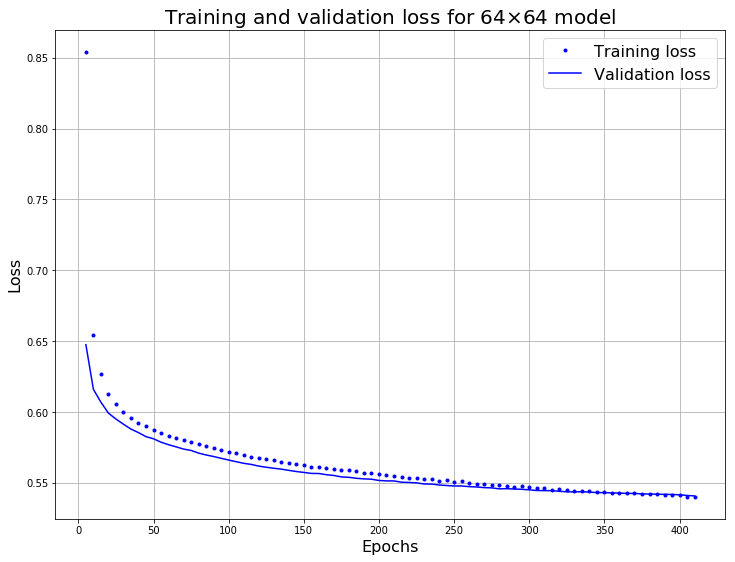

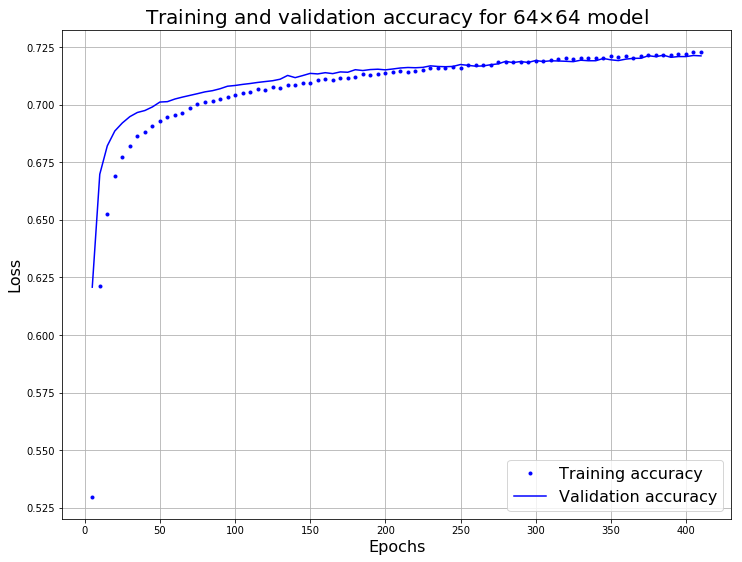

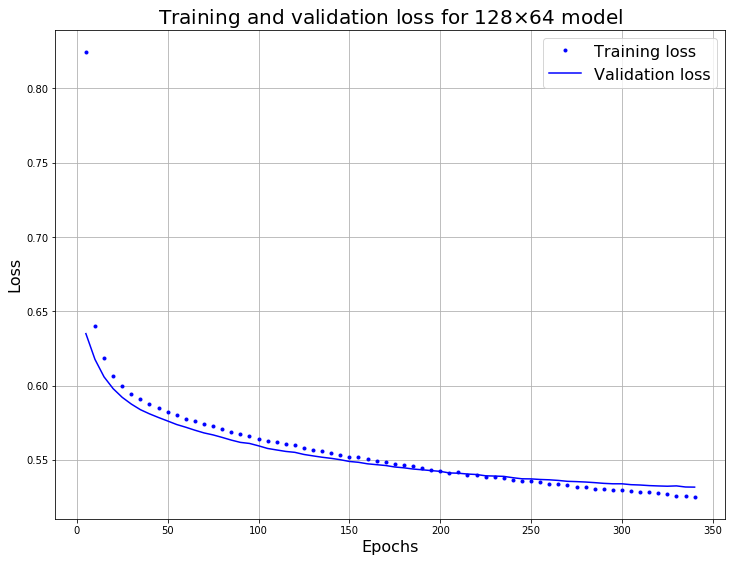

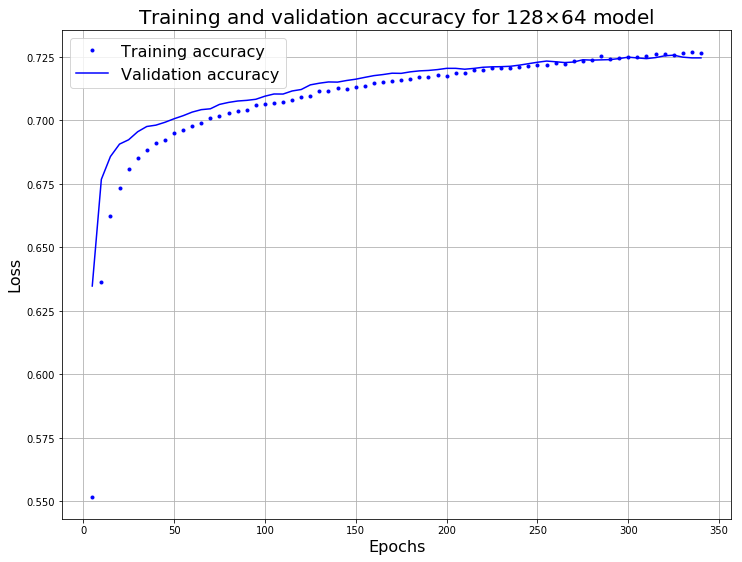

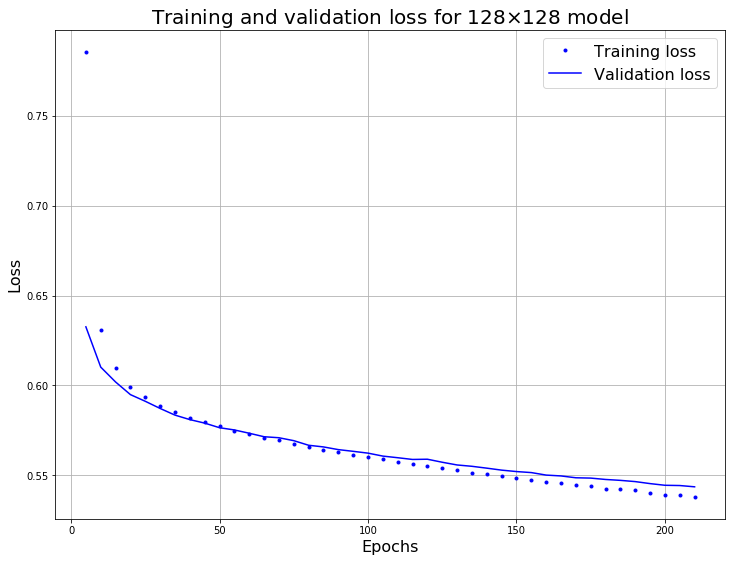

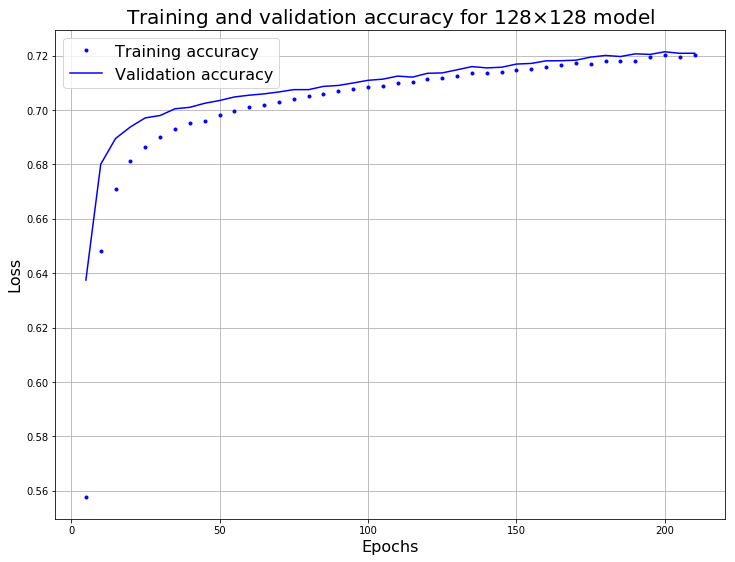

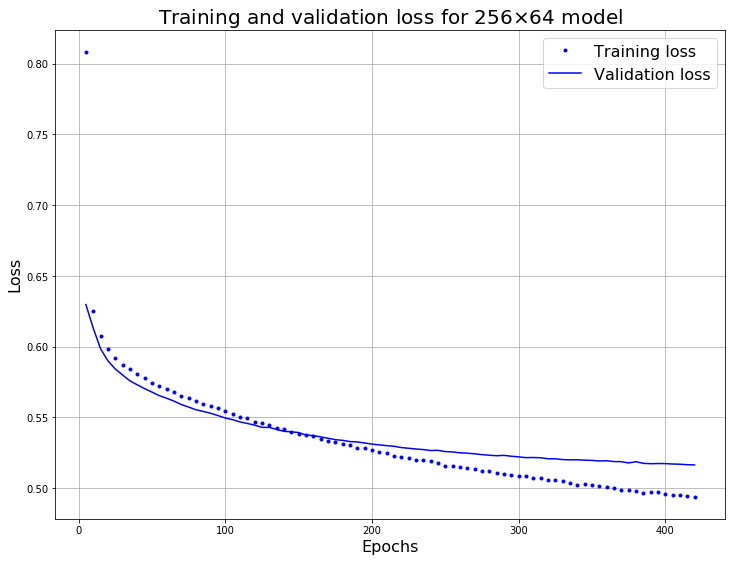

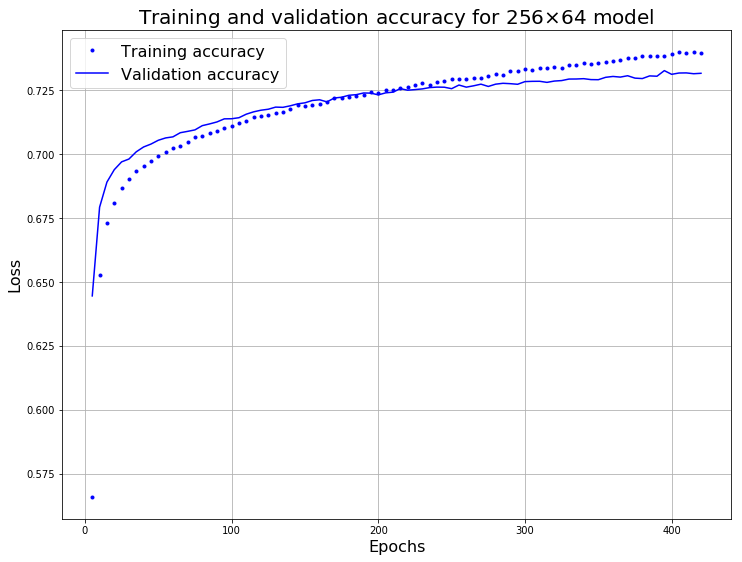

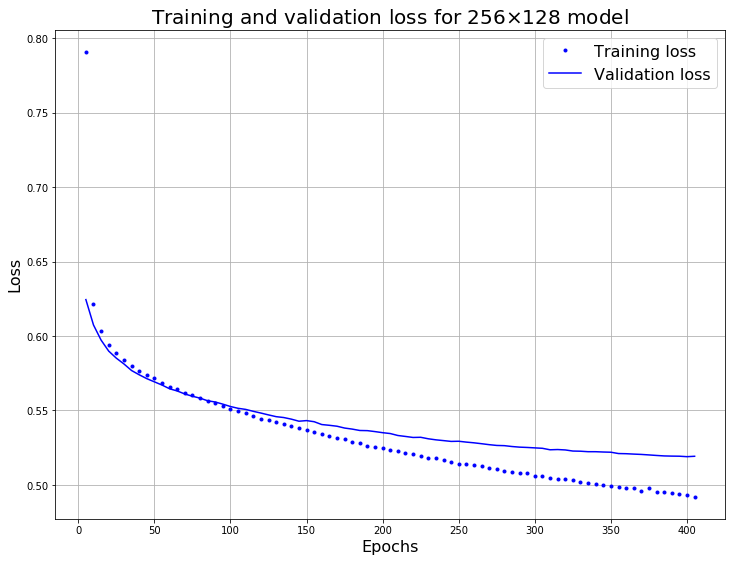

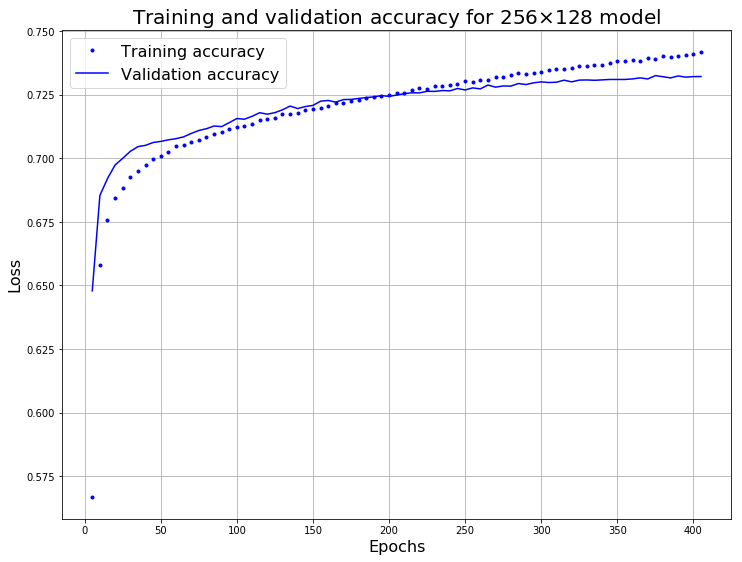

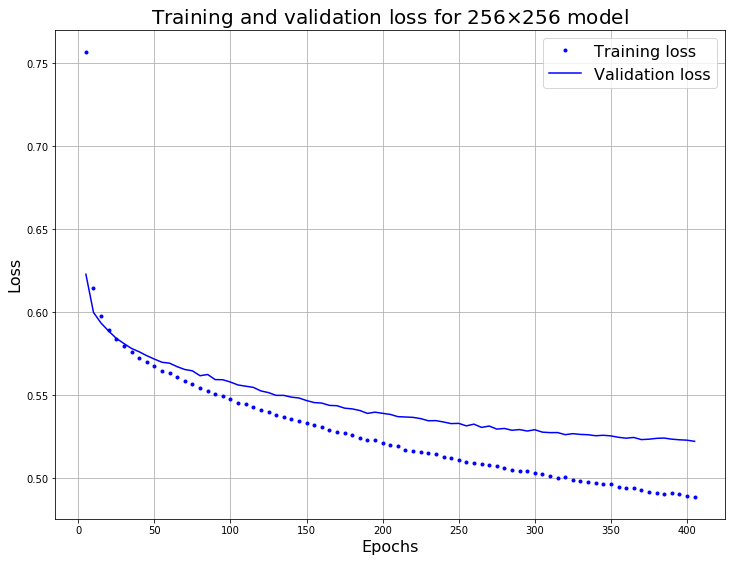

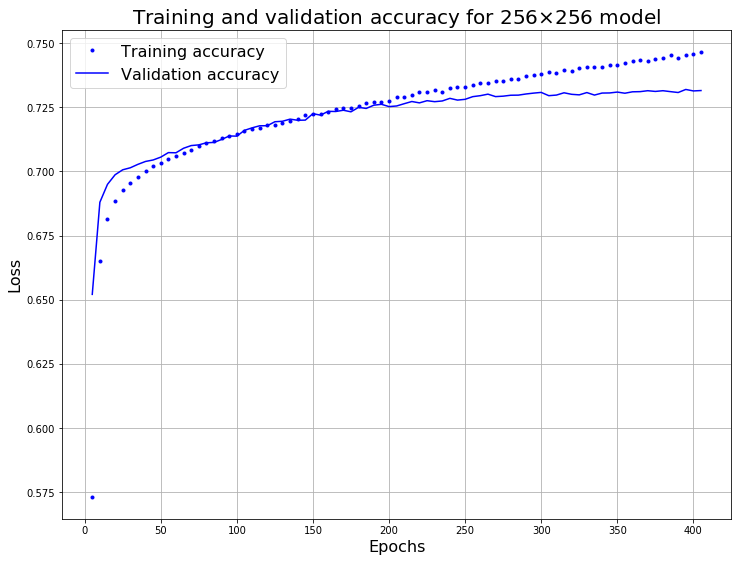

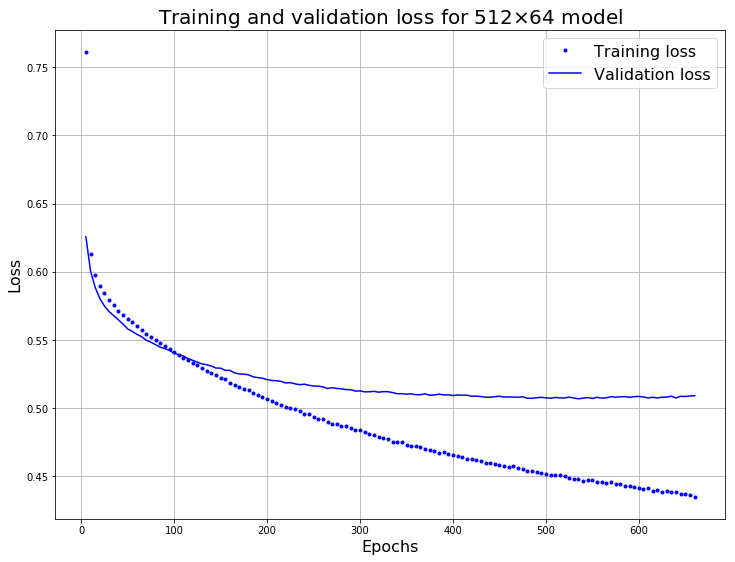

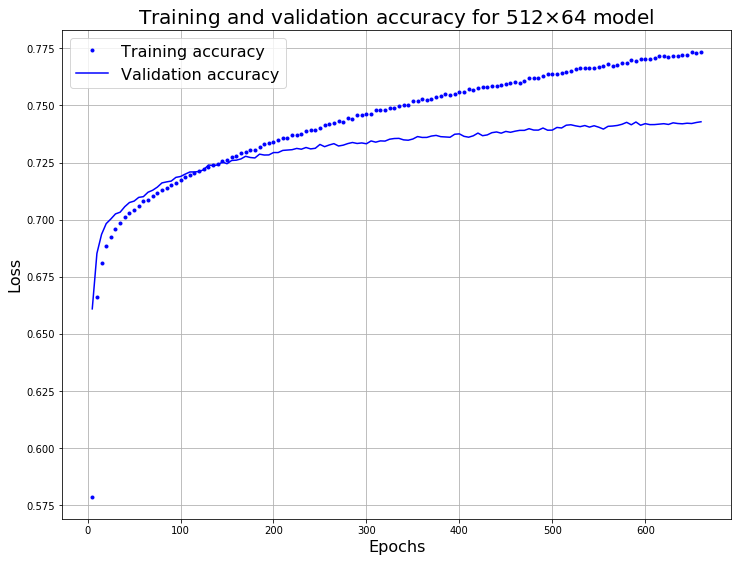

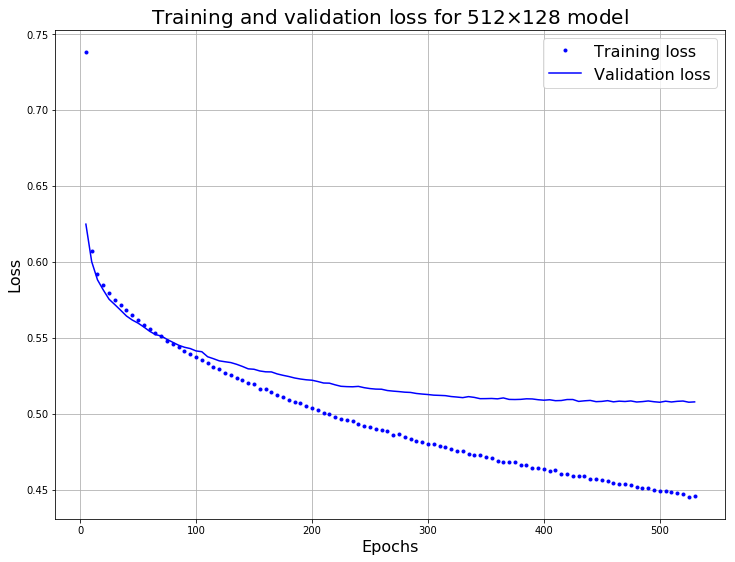

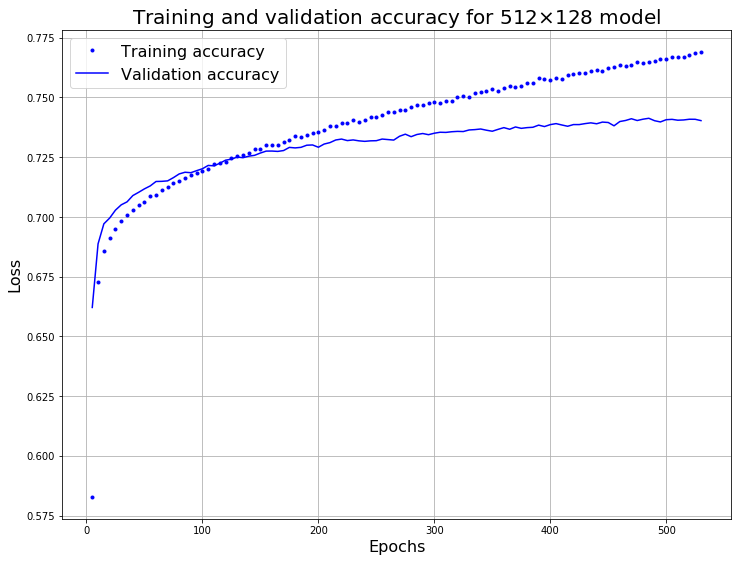

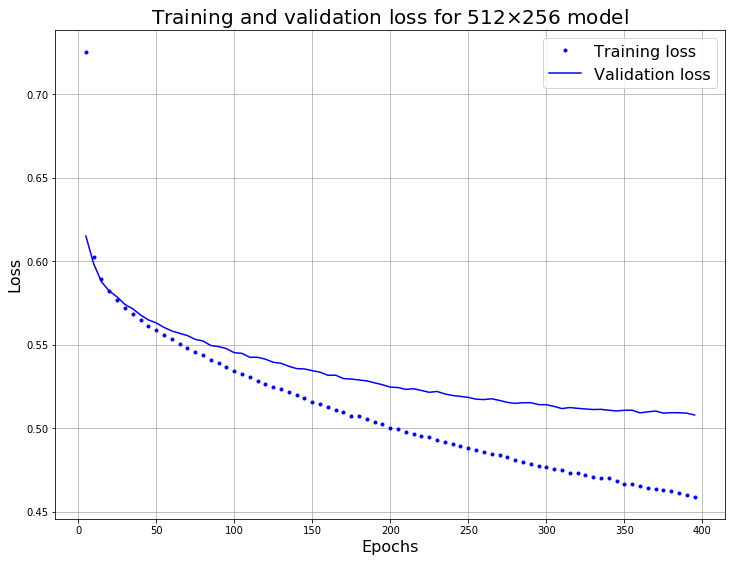

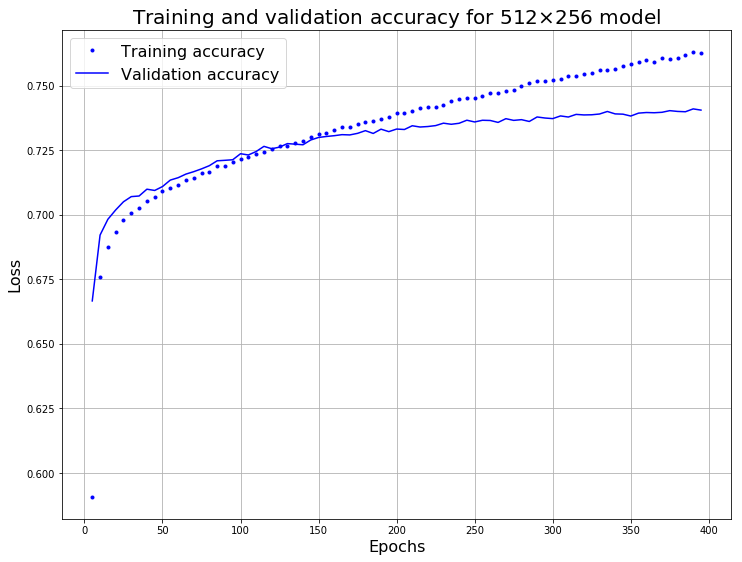

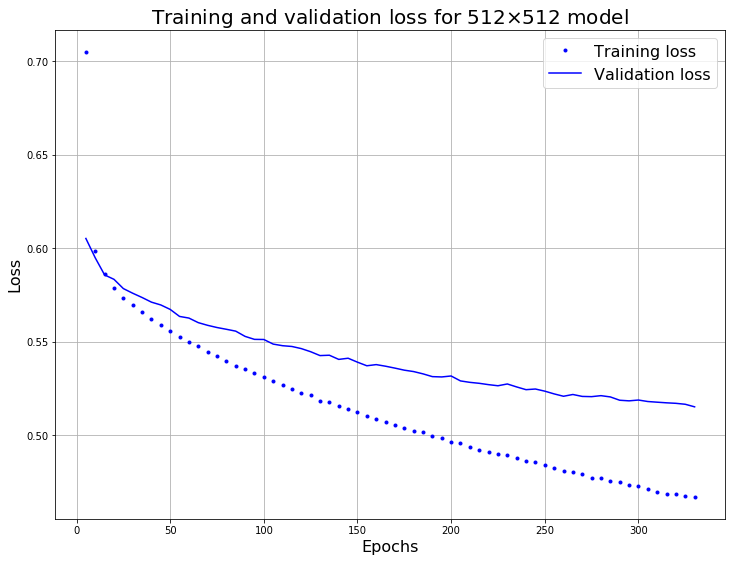

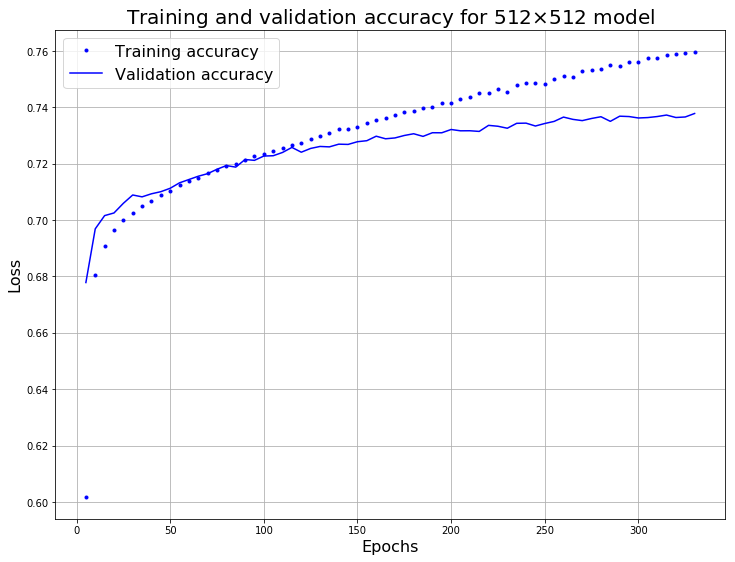

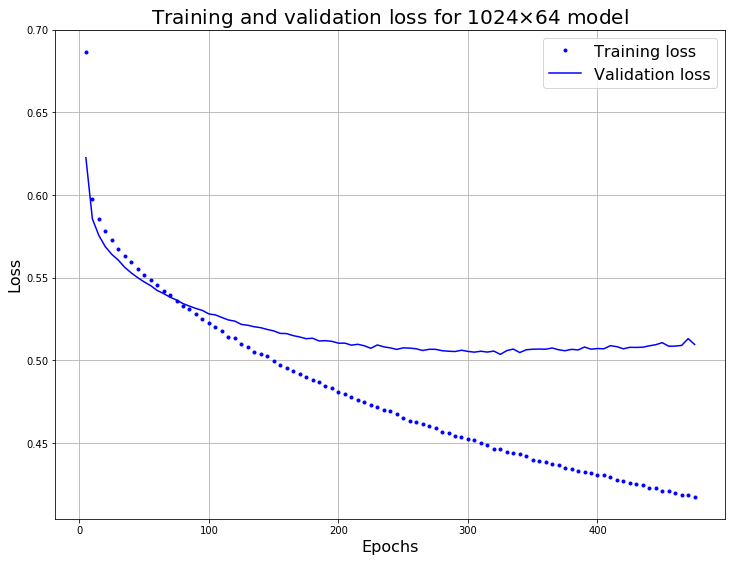

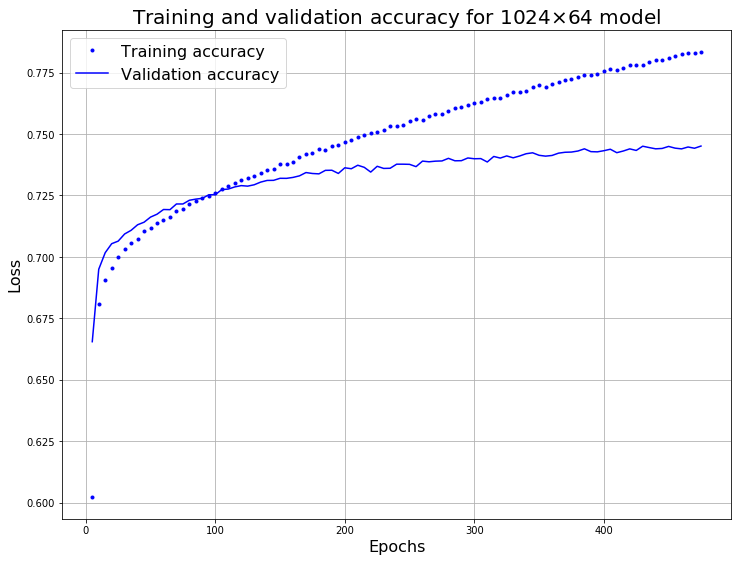

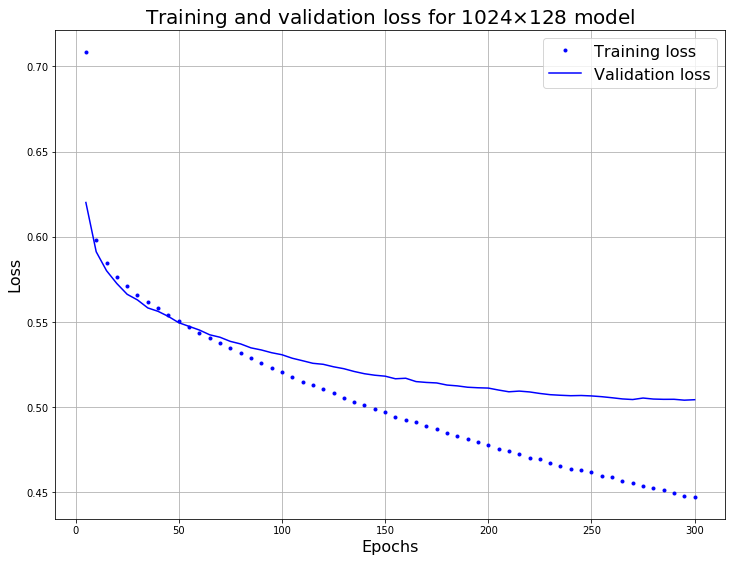

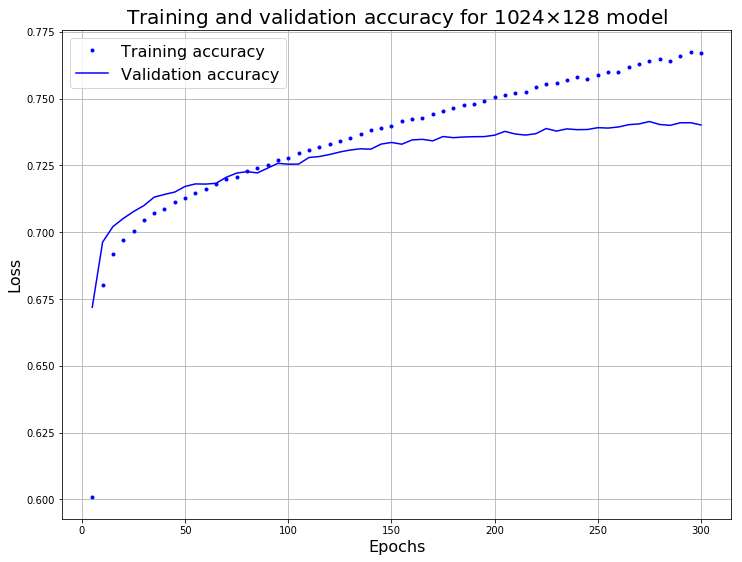

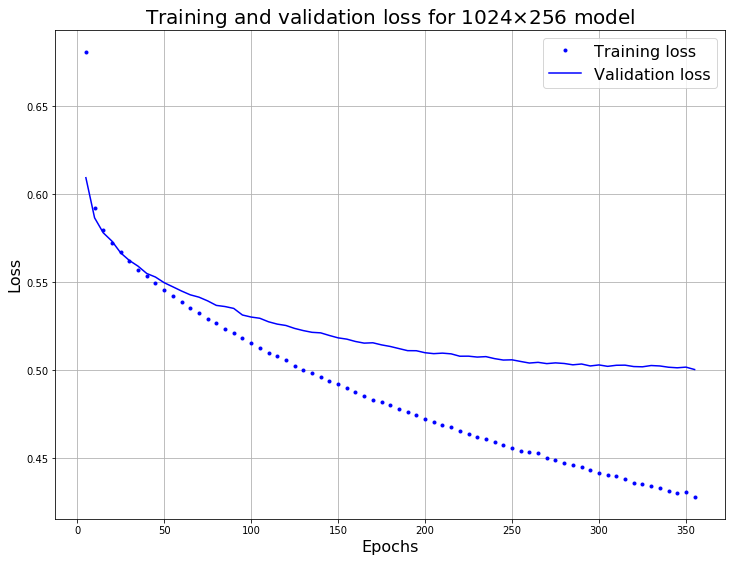

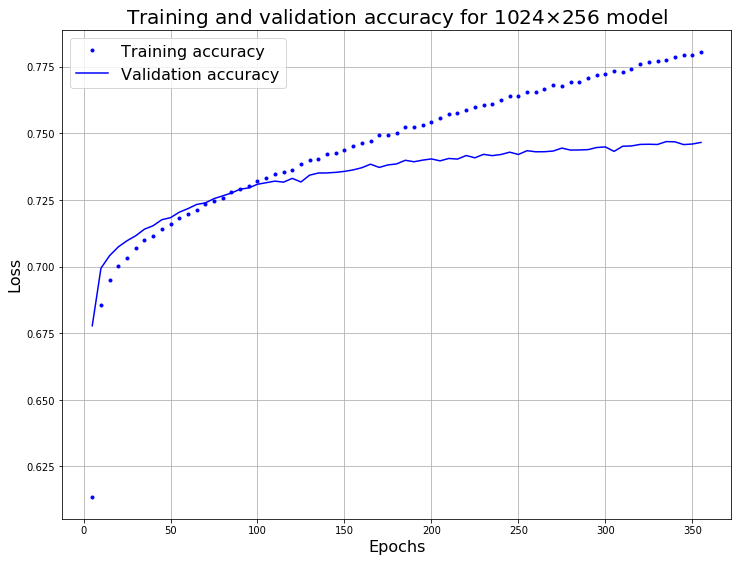

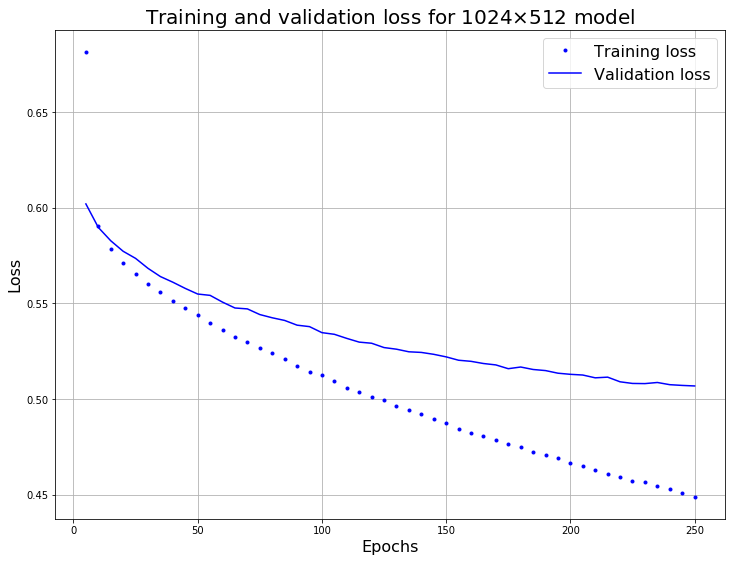

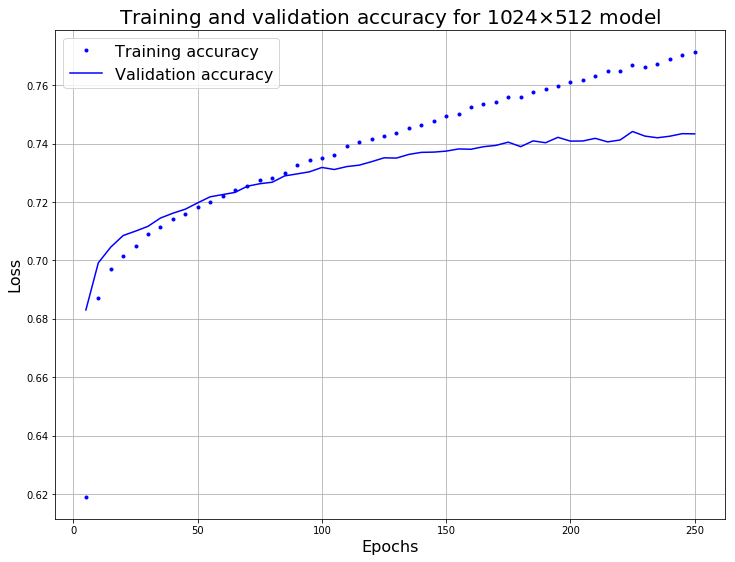

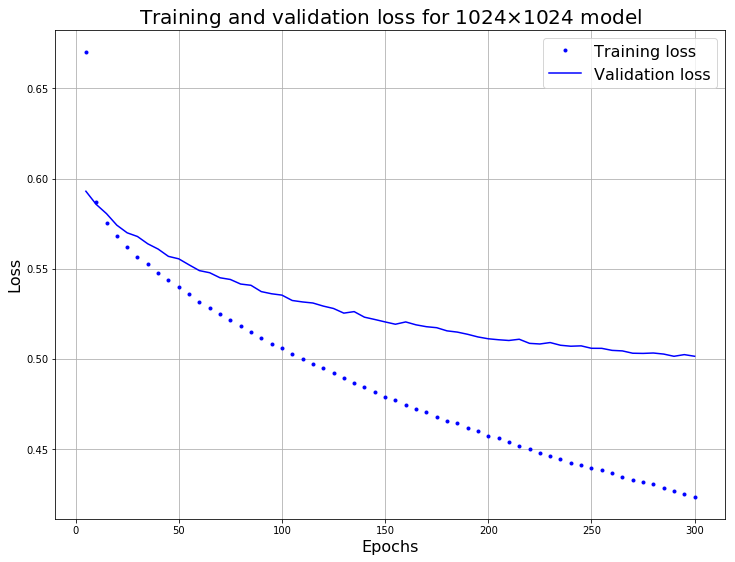

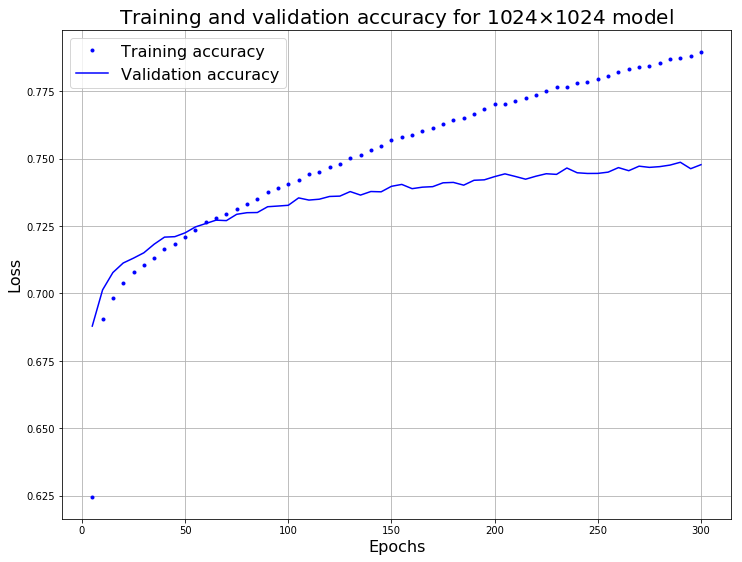

In [5]:
#Plot and display training and validation accuracy and loss.

step = 5 #Display only step-multiple epochs to avoid congested plot.

for l1 in range(6, 11):
    for l2 in range(6, l1 + 1):
        os.chdir(current_directory + '/two_layer_dense_models/histories')
        with open('{}x{}_model_history.pickle'.format(2 ** l1, 2 ** l2), 'rb') as dictionary:
            history_dict = pickle.load(dictionary)
        
        os.chdir(current_directory + '/two_layer_dense_models/plots')
        
        loss_values = [history_dict['loss'][n] for n in range(len(history_dict['loss'])) if n % step == 0]
        val_loss_values = [history_dict['val_loss'][n] for n in range(len(history_dict['val_loss'])) if n % step == 0]
        acc_values = [history_dict['acc'][n] for n in range(len(history_dict['acc'])) if n % step == 0]
        val_acc_values = [history_dict['val_acc'][n] for n in range(len(history_dict['val_acc'])) if n % step == 0]

        epochs = range(step, step * (len(acc_values) + 1), step)
        
        fig = plt.figure(figsize = (12,9))
        plt.plot(epochs, loss_values, 'b.', label = 'Training loss')
        plt.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
        plt.title('Training and validation loss for ' + str(2 ** l1) + r'$\times$' + str(2 ** l2) + ' model',
                  fontsize = 20)
        plt.xlabel('Epochs', fontsize = 16)
        plt.ylabel('Loss', fontsize = 16)
        plt.grid()
        plt.legend(fontsize = 16)
        plt.savefig(fname = 'Training_and_validation_loss_for_{}x{}_model.pdf'.format(2 ** l1, 2 ** l2))
        plt.show()

        fig = plt.figure(figsize = (12,9))
        plt.plot(epochs, acc_values, 'b.', label = 'Training accuracy')
        plt.plot(epochs, val_acc_values, 'b', label = 'Validation accuracy')
        plt.title('Training and validation accuracy for ' + str(2 ** l1) + r'$\times$' + str(2 ** l2) + ' model',
                  fontsize = 20)
        plt.xlabel('Epochs', fontsize = 16)
        plt.ylabel('Loss', fontsize = 16)
        plt.grid()
        plt.legend(fontsize = 16)
        plt.savefig(fname = 'Training_and_validation_accuracy_for_{}x{}_model.pdf'.format(2 ** l1, 2 ** l2))
        plt.show()

In [6]:
#Test models.

os.chdir(current_directory + '/two_layer_dense_models/models')

for l1 in range(6, 11):
    for l2 in range(6, l1 + 1):
        model = load_model('{}x{}_model.h5'.format(2 ** l1, 2 ** l2))
        test_loss, test_acc = model.evaluate(X_test, Y_test, verbose = 0)
        print('Test loss of {}\u00D7{} model: {}.'.format(2 ** l1, 2 ** l2, round(test_loss, 4)))
        print('Test accuracy of {}\u00D7{} model: {}%.\n'.format(2 ** l1, 2 ** l2, round(100*test_acc, 2)))

Test loss of 64×64 model: 0.5416.
Test accuracy of 64×64 model: 71.97%.

Test loss of 128×64 model: 0.5326.
Test accuracy of 128×64 model: 72.24%.

Test loss of 128×128 model: 0.5433.
Test accuracy of 128×128 model: 72.01%.

Test loss of 256×64 model: 0.5176.
Test accuracy of 256×64 model: 72.9%.

Test loss of 256×128 model: 0.5193.
Test accuracy of 256×128 model: 73.0%.

Test loss of 256×256 model: 0.5218.
Test accuracy of 256×256 model: 72.89%.

Test loss of 512×64 model: 0.51.
Test accuracy of 512×64 model: 73.95%.

Test loss of 512×128 model: 0.5062.
Test accuracy of 512×128 model: 73.96%.

Test loss of 512×256 model: 0.5077.
Test accuracy of 512×256 model: 73.91%.

Test loss of 512×512 model: 0.5151.
Test accuracy of 512×512 model: 73.61%.

Test loss of 1024×64 model: 0.5102.
Test accuracy of 1024×64 model: 74.28%.

Test loss of 1024×128 model: 0.5054.
Test accuracy of 1024×128 model: 73.84%.

Test loss of 1024×256 model: 0.5025.
Test accuracy of 1024×256 model: 74.35%.

Test loss

In [7]:
#Train selected models.

for L in [(64, 64), (256, 256), (512, 128), (1024, 1024)]:
    model = Sequential()
    model.add(Dense(L[0], activation = 'relu', input_shape = (512,)))
    model.add(Dropout(0.5))
    model.add(Dense(L[1], activation = 'relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation = 'sigmoid'))
    model.compile(optimizer = Adam(lr = 0.0001), loss = 'binary_crossentropy', metrics = ['accuracy'])
    
    history = model.fit(X_train, Y_train, epochs = 2500, batch_size = 4096, shuffle = True, verbose = 0)
    
    os.chdir(current_directory + '/two_layer_dense_models/selected_models/')
    model.save('{}x{}_model_no_val.h5'.format(L[0], L[1]))
    
    os.chdir(current_directory + '/two_layer_dense_models/selected_histories')
    with open('{}x{}_model_no_val_history.pickle'.format(L[0], L[1]), 'wb') as dictionary:
        pickle.dump(history.history, dictionary, protocol=pickle.HIGHEST_PROTOCOL)

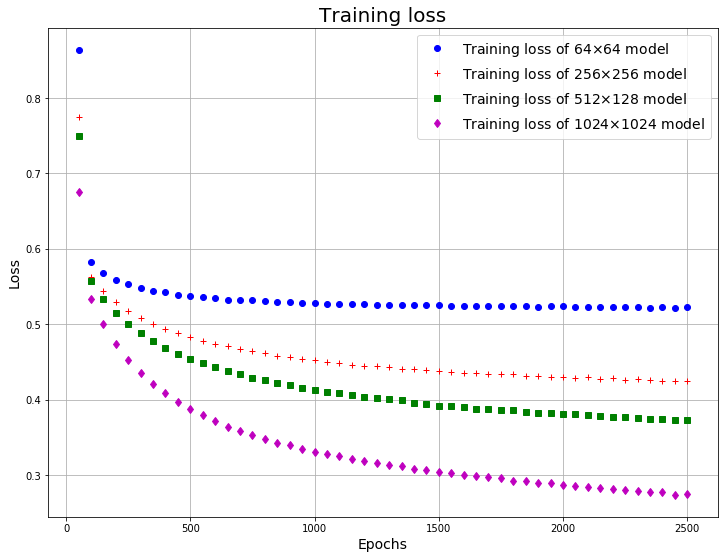

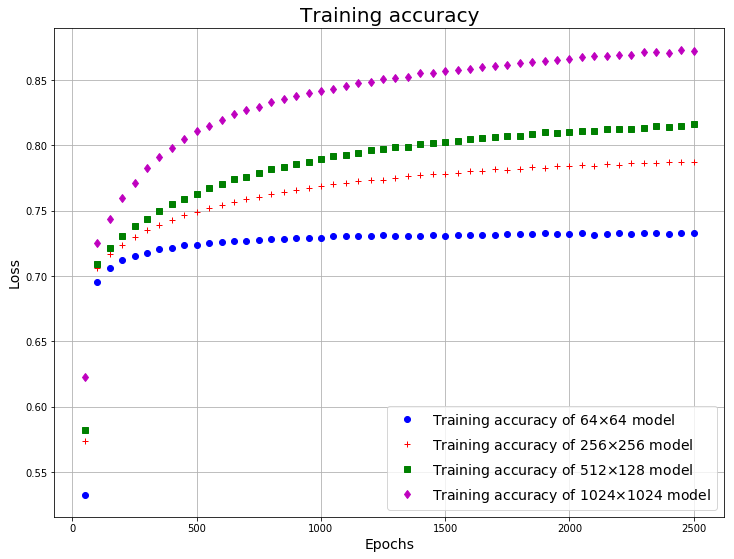

In [8]:
#Plot and display training accuracy and loss for selected models.

os.chdir(current_directory + '/two_layer_dense_models/selected_histories')

history_dict = {}
for L in [(64, 64), (256, 256), (512, 128), (1024, 1024)]:
    with open('{}x{}_model_no_val_history.pickle'.format(L[0], L[1]), 'rb') as dictionary:
        history_dict['{}x{}'.format(L[0], L[1])] = pickle.load(dictionary)

os.chdir(current_directory + '/two_layer_dense_models/selected_plots')
loss_values, acc_values = {}, {}
step = 50 #Display only step-multiple epochs to avoid congested plot.
for key in history_dict.keys():
    loss_values[key] = [history_dict[key]['loss'][n] for n in range(len(history_dict[key]['loss'])) if n % step == 0]
    acc_values[key] = [history_dict[key]['acc'][n] for n in range(len(history_dict[key]['acc'])) if n % step == 0]

epochs = range(step, step * (len(acc_values['64x64']) + 1), step)

fig = plt.figure(figsize = (12, 9))
plt.plot(epochs, loss_values['64x64'], 'bo', label = 'Training loss of 64' + r'$\times$' + '64 model')
plt.plot(epochs, loss_values['256x256'], 'r+', label = 'Training loss of 256' + r'$\times$' + '256 model')
plt.plot(epochs, loss_values['512x128'], 'gs', label = 'Training loss of 512' + r'$\times$' + '128 model')
plt.plot(epochs, loss_values['1024x1024'], 'md', label = 'Training loss of 1024' + r'$\times$' + '1024 model')
plt.title('Training loss', fontsize = 20)
plt.xlabel('Epochs', fontsize = 14)
plt.ylabel('Loss', fontsize = 14)
plt.grid()
plt.legend(fontsize = 14)
plt.savefig('Training_loss_for_selected_models.pdf')
plt.show()

fig = plt.figure(figsize = (12, 9))
plt.plot(epochs, acc_values['64x64'], 'bo', label = 'Training accuracy of 64' + r'$\times$' + '64 model')
plt.plot(epochs, acc_values['256x256'], 'r+', label = 'Training accuracy of 256' + r'$\times$' + '256 model')
plt.plot(epochs, acc_values['512x128'], 'gs', label = 'Training accuracy of 512' + r'$\times$' + '128 model')
plt.plot(epochs, acc_values['1024x1024'], 'md', label = 'Training accuracy of 1024' + r'$\times$' + '1024 model')
plt.title('Training accuracy', fontsize = 20)
plt.xlabel('Epochs', fontsize = 14)
plt.ylabel('Loss', fontsize = 14)
plt.grid()
plt.legend(fontsize = 14)
plt.savefig('Training_accuracy_for_selected_models.pdf')
plt.show()

In [9]:
#Test selected models.

os.chdir(current_directory + '/two_layer_dense_models/selected_models')

for L in [(64, 64), (256, 256), (512, 128), (1024, 1024)]:
    model = load_model('{}x{}_model_no_val.h5'.format(L[0], L[1]))
    test_loss, test_acc = model.evaluate(X_test, Y_test, verbose = 0)
    print('Test loss of {}\u00D7{} model: {}.'.format(L[0], L[1], round(test_loss, 4)))
    print('Test accuracy of {}\u00D7{} model: {}%.\n'.format(L[0], L[1], round(100*test_acc, 2)))

Test loss of 64×64 model: 0.5385.
Test accuracy of 64×64 model: 72.14%.

Test loss of 256×256 model: 0.5194.
Test accuracy of 256×256 model: 73.74%.

Test loss of 512×128 model: 0.5127.
Test accuracy of 512×128 model: 74.73%.

Test loss of 1024×1024 model: 0.4895.
Test accuracy of 1024×1024 model: 76.45%.



In [10]:
#Misclassified positive examples (false negatives).

os.chdir(current_directory + '/two_layer_dense_models/selected_models')

for L in [(64, 64), (256, 256), (512, 128), (1024, 1024)]:
    model = load_model('{}x{}_model_no_val.h5'.format(L[0], L[1]))
    
    predictions = model.predict(X_test) >= 0.5 
    mislabeled = np.zeros(Y_test.shape)
    for m in range(mislabeled.shape[0]):
        if Y_test[m] == 1 and predictions[m] == 0:
            mislabeled[m] = 1
    per = np.sum(mislabeled) / mislabeled.shape[0]
    
    print('Percentage of misclassified positive test examples (false negatives) for {}\u00D7{} model: {}%.'.format(L[0], L[1], round(100*per, 2)))
    
os.chdir(current_directory)

Percentage of misclassified positive test examples (false negatives) for 64×64 model: 13.5%.
Percentage of misclassified positive test examples (false negatives) for 256×256 model: 12.32%.
Percentage of misclassified positive test examples (false negatives) for 512×128 model: 9.32%.
Percentage of misclassified positive test examples (false negatives) for 1024×1024 model: 11.0%.
